In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

import nbi

In [2]:
print(nbi.__version__)

0.1.1


here we consider a very simple sine wave model, where t is time, f is frequency, A is amplitude, and $\phi_0$ is initial phase:

$f(t) = A\cdot\sin(f\cdot t+\phi_0$)

In [3]:
t = np.linspace(0,1,50)
def sine(param):
    phi0, A, freq = param
    return np.sin(t * freq + phi0) * A

## Sequential Inference

<ErrorbarContainer object of 3 artists>

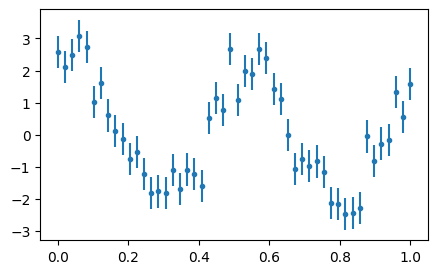

In [4]:
# this is our example data for inference
x_err = 0.5
np.random.seed(0)
y_true = [1, 2, 4*np.pi]
x_obs = sine(y_true) + np.random.normal(size=50) * x_err
plt.figure(figsize=(5,3))
plt.errorbar(t, x_obs, yerr=x_err, fmt='.')

## nbi set-up

normally for mcmc we would supply the likelihood function and the prior function. For nbi, we split the likelihood function into the physical model (sine) and the noise model (iid gaussian). For the noise model, we need a function to add noise for training, and a function to evaluate the likelihood given data, model, and errorbar. We also need a function to sample from the prior for the first round training set

if we only care about the particular x_obs generated above, then we apply nbi in multiple rounds

In [5]:
from scipy.stats import uniform, truncnorm
prior = {
    'phi0': uniform(loc=0, scale=np.pi*2),
    'A': uniform(loc=1, scale=4),
    'freq': uniform(loc=2*np.pi, scale=10*np.pi)
}
labels = list(prior.keys())
prior = [prior[k] for k in labels]

In [6]:
labels

['phi0', 'A', 'freq']

Generating simulations


512it [00:00, 1346.61it/s]


Effective sample size for this round 0.4
Effective sample size for all rounds:  0.4

---------------------- Round: 0 ----------------------

Epoch: 0


Val, Log likelihood in nats: -1.648079: 100%|████████████████████████████████████████| 512/512 [00:00<00:00, 1596.59it/s]



Epoch: 1


Val, Log likelihood in nats: -1.200924: 100%|████████████████████████████████████████| 512/512 [00:00<00:00, 1565.94it/s]



Epoch: 2


Val, Log likelihood in nats: -1.536048: 100%|████████████████████████████████████████| 512/512 [00:00<00:00, 1587.09it/s]



Epoch: 3


Val, Log likelihood in nats: 0.278749: 100%|█████████████████████████████████████████| 512/512 [00:00<00:00, 1582.04it/s]



Epoch: 4


Val, Log likelihood in nats: 1.103656: 100%|█████████████████████████████████████████| 512/512 [00:00<00:00, 1546.33it/s]



Epoch: 5


Val, Log likelihood in nats: 2.088082: 100%|█████████████████████████████████████████| 512/512 [00:00<00:00, 1556.97it/s]



Epoch: 6


Val, Log likelihood in nats: 2.839883: 100%|█████████████████████████████████████████| 512/512 [00:00<00:00, 1559.50it/s]



Epoch: 7


Val, Log likelihood in nats: 2.879079: 100%|█████████████████████████████████████████| 512/512 [00:00<00:00, 1544.54it/s]



Epoch: 8


Val, Log likelihood in nats: 3.372730: 100%|█████████████████████████████████████████| 512/512 [00:00<00:00, 1565.01it/s]



Epoch: 9


Val, Log likelihood in nats: 3.353640: 100%|█████████████████████████████████████████| 512/512 [00:00<00:00, 1560.95it/s]


surrogate posterior


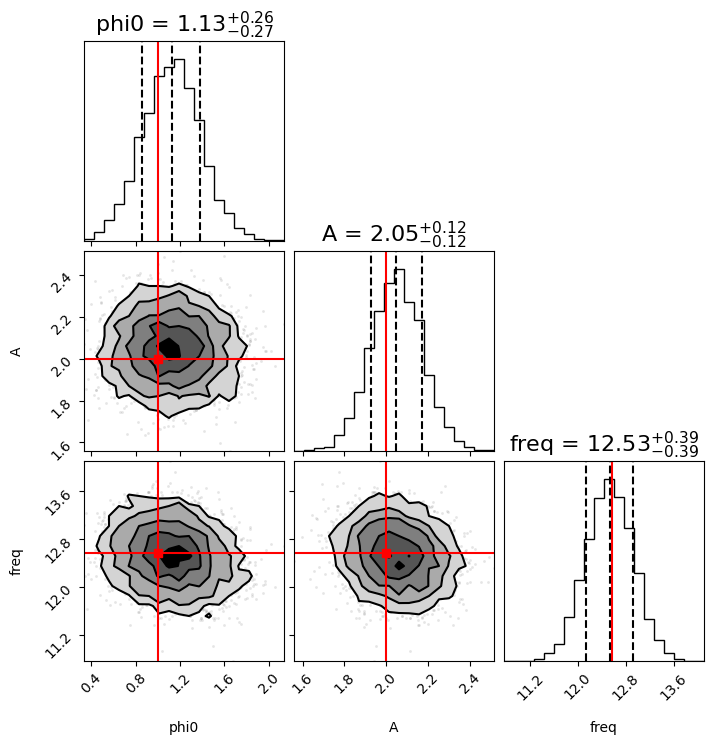

Generating simulations


512it [00:00, 1604.01it/s]


reweighted posterior from current round


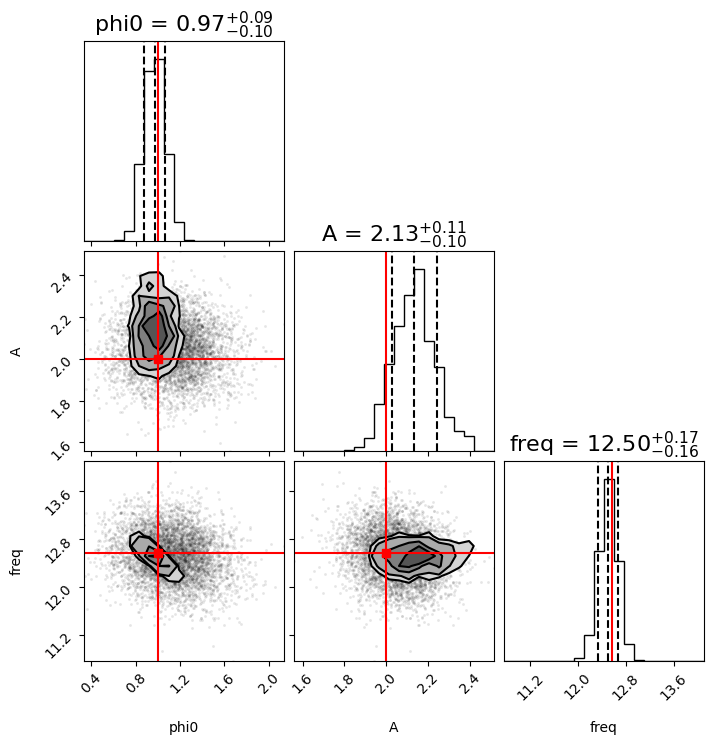

Effective sample size for this round 389.6
Effective sample size for all rounds:  390.0

---------------------- Round: 1 ----------------------

Epoch: 0


Val, Log likelihood in nats: -4.115834: 100%|████████████████████████████████████████| 512/512 [00:00<00:00, 1556.26it/s]



Epoch: 1


Val, Log likelihood in nats: -2.874801: 100%|████████████████████████████████████████| 512/512 [00:00<00:00, 1557.37it/s]



Epoch: 2


Val, Log likelihood in nats: -2.473231: 100%|████████████████████████████████████████| 512/512 [00:00<00:00, 1565.36it/s]



Epoch: 3


Val, Log likelihood in nats: -2.250228: 100%|████████████████████████████████████████| 512/512 [00:00<00:00, 1551.13it/s]



Epoch: 4


Val, Log likelihood in nats: -1.709236: 100%|████████████████████████████████████████| 512/512 [00:00<00:00, 1583.81it/s]



Epoch: 5


Val, Log likelihood in nats: -1.983002: 100%|████████████████████████████████████████| 512/512 [00:00<00:00, 1532.82it/s]



Epoch: 6


Val, Log likelihood in nats: -1.448028: 100%|████████████████████████████████████████| 512/512 [00:00<00:00, 1491.56it/s]



Epoch: 7


Val, Log likelihood in nats: -1.224801: 100%|████████████████████████████████████████| 512/512 [00:00<00:00, 1538.03it/s]



Epoch: 8


Val, Log likelihood in nats: -1.211956: 100%|████████████████████████████████████████| 512/512 [00:00<00:00, 1540.52it/s]



Epoch: 9


Val, Log likelihood in nats: -1.187601: 100%|████████████████████████████████████████| 512/512 [00:00<00:00, 1535.18it/s]


surrogate posterior


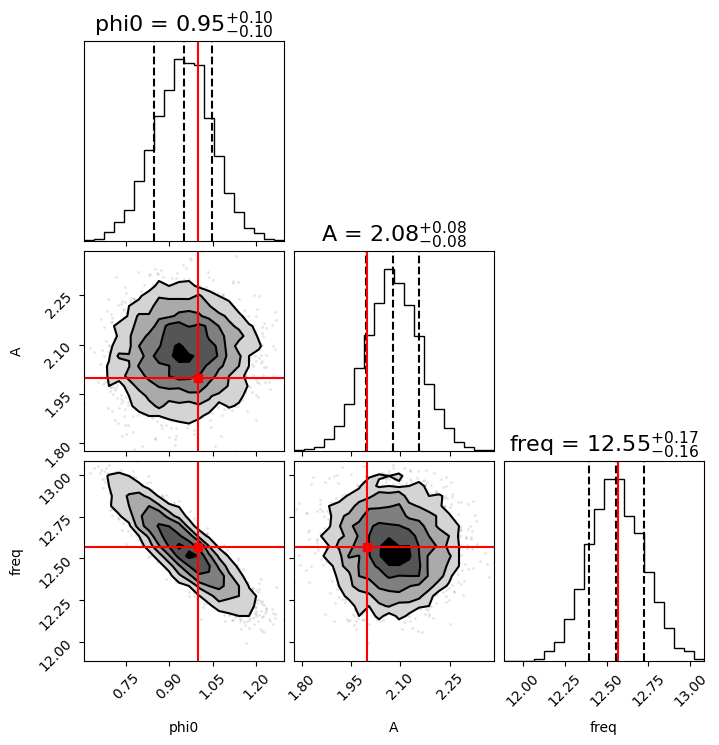

Generating simulations


512it [00:00, 1580.01it/s]


reweighted posterior from current round


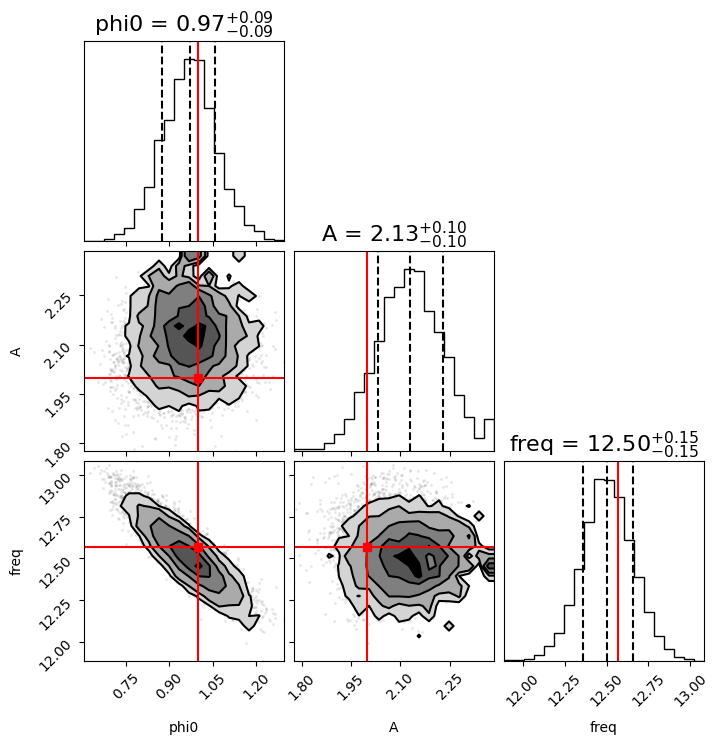

Effective sample size for this round 2029.9
Effective sample size for all rounds:  2419.9
reweighted posterior from all rounds


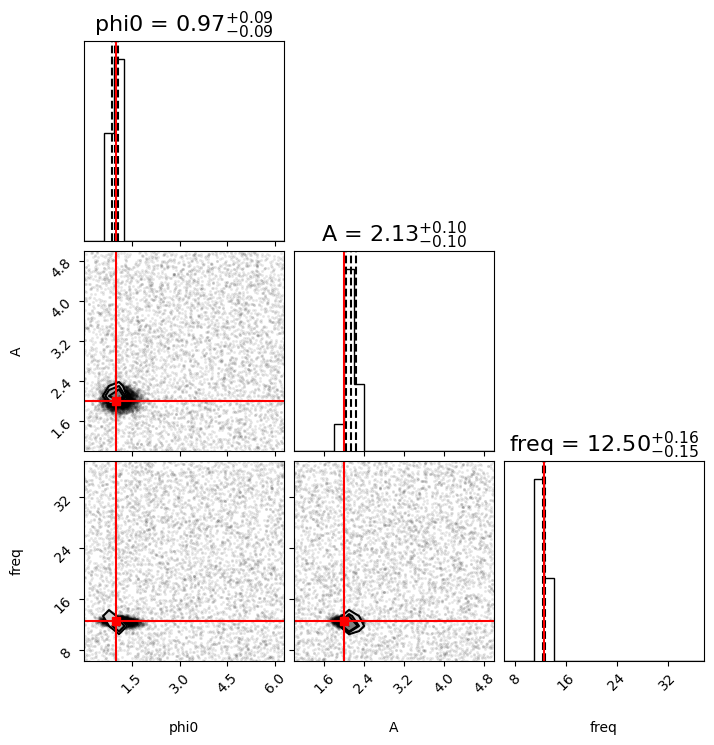

In [16]:
# hyperparameters for the normalizing flow
flow_config = {
    'flow_hidden': 32,
    'num_cond_inputs': 32,
    'num_blocks': 4,
    'n_mog': 1                # number of gaussian mixture
}

featurizer_config = {
    'type': 'sequence',
    'dim_in': 1,
    'dim_conv_max': 256,
    'depth': 3
}

# nbi has pre-defined neural networks for sequential data

engine = nbi.NBI(
    featurizer_config,
    flow_config=flow_config,
    simulator=sine,
    noise=np.array([0.5]*50),
    prior=prior,
    labels=labels,
    n_jobs=10,         # for generating training set
    tqdm_notebook=False
)

engine.fit(
    n_rounds=2,
    n_per_round=5120,
    n_epochs=10,
    obs=x_obs,
    y_true=y_true
)

## Amortized Inference

if we care about a large number of different x_obs, then train nbi for only 1 round on samples generated from the prior space of interest

In [7]:
def noise(x, y=None):
    rand = np.random.normal(0, 1, size=x.shape[0])
    
    # let's say x_err is drawn from [0.5, 2.5]
    x_err = np.random.uniform() * 2 + 0.5
    x_noise = x + rand * x_err
    return x_noise, y

In [8]:
# hyperparameters for the normalizing flow
flow_config = {
    'flow_hidden': 32,
    'num_cond_inputs': 32,
    'num_blocks': 4,
    'n_mog': 1                # number of gaussian mixture
}

featurizer_config = {
    'type': 'sequence',
    'dim_in': 1,
    'dim_conv_max': 256,
    'depth': 3
}

# nbi has pre-defined neural networks for sequential data

engine = nbi.NBI(
    featurizer_config,
    flow_config=flow_config,
    simulator=sine,
    noise=noise,
    prior=prior,
    labels=labels,
    n_jobs=10,         # for generating training set
    parallel=True,      # only useful if GPU available
    tqdm_notebook=False
)

engine.fit(
    n_rounds=1,
    n_per_round=5120*2,
    n_epochs=10
)

Generating simulations


1024it [00:00, 1317.45it/s]
/Users/Keming/anaconda3/envs/nbi-py38/lib/python3.8/multiprocessing/resource_tracker.py:216: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/Users/Keming/anaconda3/envs/nbi-py38/lib/python3.8/multiprocessing/resource_tracker.py:216: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/Users/Keming/anaconda3/envs/nbi-py38/lib/python3.8/multiprocessing/resource_tracker.py:216: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/Users/Keming/anaconda3/envs/nbi-py38/lib/python3.8/multiprocessing/resource_tracker.py:216: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('re


---------------------- Round: 0 ----------------------

Epoch: 0


Val, Log likelihood in nats: -2.401485: 100%|██████████████████████████████████████| 1024/1024 [00:00<00:00, 1663.38it/s]



Epoch: 1


Val, Log likelihood in nats: -0.981693: 100%|██████████████████████████████████████| 1024/1024 [00:00<00:00, 1620.43it/s]



Epoch: 2


Val, Log likelihood in nats: -0.020248: 100%|██████████████████████████████████████| 1024/1024 [00:00<00:00, 1511.28it/s]



Epoch: 3


Val, Log likelihood in nats: 0.345228: 100%|███████████████████████████████████████| 1024/1024 [00:00<00:00, 1614.95it/s]



Epoch: 4


Val, Log likelihood in nats: 0.803542: 100%|███████████████████████████████████████| 1024/1024 [00:00<00:00, 1677.82it/s]



Epoch: 5


Val, Log likelihood in nats: 1.042423: 100%|███████████████████████████████████████| 1024/1024 [00:00<00:00, 1634.52it/s]



Epoch: 6


Val, Log likelihood in nats: 1.370436: 100%|███████████████████████████████████████| 1024/1024 [00:00<00:00, 1671.20it/s]



Epoch: 7


Val, Log likelihood in nats: 1.466860: 100%|███████████████████████████████████████| 1024/1024 [00:00<00:00, 1627.87it/s]



Epoch: 8


Val, Log likelihood in nats: 1.524868: 100%|███████████████████████████████████████| 1024/1024 [00:00<00:00, 1694.27it/s]



Epoch: 9


Val, Log likelihood in nats: 1.627259: 100%|███████████████████████████████████████| 1024/1024 [00:00<00:00, 1527.51it/s]


to do inference with the trained engine, input x_obs and desired effective sample size of the posterior sample

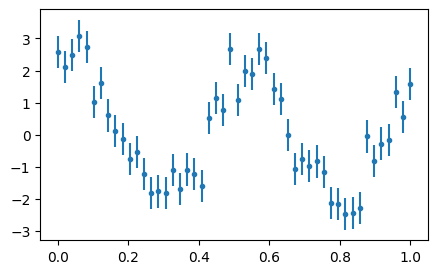

Generating simulations


100it [00:00, 1745.39it/s]


Sampling efficiency = 0.1
Requires N = 11496 more simulations
Samples outside prior N = 5
Generating simulations


1150it [00:00, 1593.52it/s]


Total effective sample size N = 1029.3


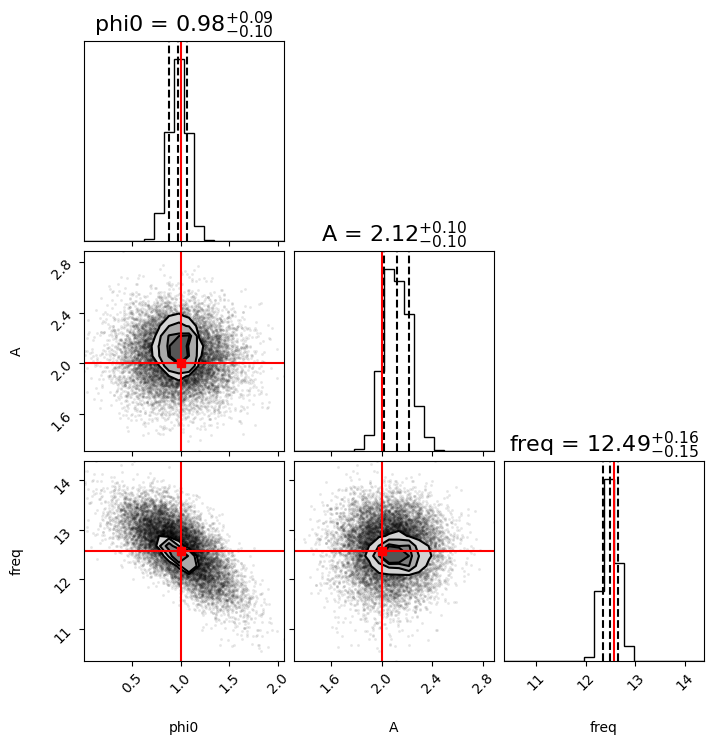

In [14]:
x_err = 0.5
np.random.seed(0)
y_true = [1, 2, 4*np.pi]
x_obs = sine(y_true) + np.random.normal(size=50) * x_err
plt.figure(figsize=(5,3))
plt.errorbar(t, x_obs, yerr=x_err, fmt='.')
plt.show()
y_sample, weights = engine.predict(x_obs, log_like=np.array([0.5]), neff_target=1000, y_true=y_true, corner_after=True)

In [17]:
!ls test

0           0_y_all.npy 1_y.npy     2_x.npy     3_w.npy
0_w.npy     1           1_y_all.npy 2_y.npy     3_x.npy
0_x.npy     1_w.npy     2           2_y_all.npy 3_y.npy
0_y.npy     1_x.npy     2_w.npy     3           3_y_all.npy


In [21]:
X = np.load('test/0_x.npy')
Y = np.load('test/0_y.npy')

In [27]:
# hyperparameters for the normalizing flow
flow_config = {
    'flow_hidden': 32,
    'num_cond_inputs': 32,
    'num_blocks': 4,
    'n_mog': 1                # number of gaussian mixture
}

featurizer_config = {
    'type': 'sequence',
    'dim_in': 1,
    'dim_conv_max': 256,
    'depth': 3
}
engine = nbi.NBI(
    featurizer_config,
    flow_config=flow_config,
    simulator=sine,
    noise=noise,
    X=X,
    Y=Y,
    labels=labels,
    n_jobs=10,         # for generating training set
    parallel=True,      # only useful if GPU available
    tqdm_notebook=False
)

engine.fit(
    n_rounds=1,
    n_per_round=5120*2,
    n_epochs=10
)

Use precomputed simulations for round  0

---------------------- Round: 0 ----------------------

Epoch: 0



Train, Log likelihood in nats: -3.420278:  19%|███████▏                             | 1792/9216 [00:03<00:12, 581.99it/s]

KeyboardInterrupt: 